In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import hashlib

In [2]:
def remove_duplicates(dataset_folder):
    folder_dict = dict(train=[], valid=[], test=[])

    hashes = set()
    for folder in folder_dict.keys():
        folder_path = os.path.join(dataset_folder, folder)
        if not os.path.exists(folder_path):
            continue
        for filename in os.listdir(folder_path):
            if filename == "_classes.csv":
                continue
            path = os.path.join(folder_path, filename)
            digest = hashlib.sha1(open(path,'rb').read()).digest()
            if digest not in hashes:
                hashes.add(digest)
                folder_dict[folder].append(filename)
            else:
                os.remove(path)

    for folder, files in folder_dict.items():
        classes_file_path = os.path.join(dataset_folder, folder, "_classes.csv")
        if not os.path.exists(classes_file_path):
            continue
        classes_df = pd.read_csv(classes_file_path)
        classes_df = classes_df[classes_df["filename"].isin(files)].reset_index(drop=True)
        classes_df.to_csv(classes_file_path, index=False)

In [3]:
remove_duplicates("data")

In [15]:
def get_dataset_folders(parent_folder_path="data"):
    dataset_folders = []
    for folder in os.listdir(parent_folder_path):
        folder_path = os.path.join(parent_folder_path, folder)
        if not os.path.isdir(folder_path):
            continue
        elif folder.startswith("."):
            continue
        dataset_folders.append(folder_path)
    return dataset_folders

In [16]:
get_dataset_folders("data")

['data/swastika_detect.v1i.multiclass',
 'data/Swastika_Detection.v2i.multiclass',
 'data/garofaf.v5i.multiclass',
 'data/Swast.v1i.multiclass',
 'data/symbols.v1i.multiclass',
 'data/Content moderation.v1i.multiclass',
 'data/swastika.v4i.multiclass',
 'data/violent object.v2i.multiclass',
 'data/hate symbol.v3i.multiclass',
 'data/detect.v1i.multiclass',
 'data/swastika.v1i.multiclass',
 'data/explicit1.v1i.multiclass']

In [24]:
import shutil

def merge_train_valid_test(dataset_folder):
    classes_dfs = []
    for subfolder in ["train", "valid", "test"]:
        subfolder_path = os.path.join(dataset_folder, subfolder)
        if not os.path.exists(subfolder_path):
            continue
        shutil.copytree(subfolder_path, dataset_folder, ignore=shutil.ignore_patterns("*.csv"), dirs_exist_ok=True)

        classes_file_path = os.path.join(subfolder_path, "_classes.csv")
        if not os.path.exists(classes_file_path):
            continue
        classes_df = pd.read_csv(classes_file_path)
        classes_dfs.append(classes_df)

        shutil.rmtree(subfolder_path)
    classes_df = pd.concat(classes_dfs)
    classes_df.to_csv(os.path.join(dataset_folder, "_classes.csv"), index=False)
    

In [27]:
dataset_folders = get_dataset_folders("data")
for dataset_folder in dataset_folders:
    merge_train_valid_test(dataset_folder)

In [4]:
train_df = pd.read_csv("/Users/zhiweizhang/Projects/master-thesis/data/train/_classes.csv")
valid_df = pd.read_csv("/Users/zhiweizhang/Projects/master-thesis/data/valid/_classes.csv")
test_df = pd.read_csv("/Users/zhiweizhang/Projects/master-thesis/data/test/_classes.csv")

In [5]:
df = pd.concat([train_df, valid_df, test_df])

In [7]:
df

,filename,1,BUF,anne_frank,antifa,atomwaffen,bh_emblem,black_sun,british_union_of_fascist,broken_sun_cross,...,sa_emblem,siegrune,ss_skull,star of david,swastika,tiwaz,triskelion,valknut,vril,wolfsangel
0,80a4f72fbb195ffcf75ca3083e65e42fbf42e8aa_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,images-2023-10-03T123441-535_jpg.rf.5d29bcab8d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35_png.rf.5d3a909136c40e18c330c8d9ed61de3b.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3341339627367802872_jpg.rf.5d4c3e55dbdd0fcc71c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,bddc5acbd9bc1080b0f11039766e5f383aef9e69_full_...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,cbb1067e21a6df35ed6207cbb47caa552c15fdbd_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
260,02651d2df9c10f7963bb028cf17a0904916f215c_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
261,aufmacher-1933-1945-chronik-100__t-15066096214...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
262,swastika-56_jpg.rf.febfb989b2aaf90640c9812dc56...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
df = df.reset_index(drop=True)

In [11]:
original_train_df = pd.read_csv("/Users/zhiweizhang/Downloads/nazi-symbols1.v1i.multiclass/train/_classes.csv")
original_valid_df = pd.read_csv("/Users/zhiweizhang/Downloads/nazi-symbols1.v1i.multiclass/valid/_classes.csv")
original_test_df = pd.read_csv("/Users/zhiweizhang/Downloads/nazi-symbols1.v1i.multiclass/test/_classes.csv")
original_df = pd.concat([original_train_df, original_valid_df, original_test_df])

In [12]:
original_df

,filename,1,BUF,anne_frank,antifa,atomwaffen,bh_emblem,black_sun,british_union_of_fascist,broken_sun_cross,...,sa_emblem,siegrune,ss_skull,star of david,swastika,tiwaz,triskelion,valknut,vril,wolfsangel
0,80a4f72fbb195ffcf75ca3083e65e42fbf42e8aa_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,images-2023-10-03T123441-535_jpg.rf.5d29bcab8d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35_png.rf.5d3a909136c40e18c330c8d9ed61de3b.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3341339627367802872_jpg.rf.5d4c3e55dbdd0fcc71c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,bddc5acbd9bc1080b0f11039766e5f383aef9e69_full_...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,cbb1067e21a6df35ed6207cbb47caa552c15fdbd_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
262,02651d2df9c10f7963bb028cf17a0904916f215c_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
263,aufmacher-1933-1945-chronik-100__t-15066096214...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
264,swastika-56_jpg.rf.febfb989b2aaf90640c9812dc56...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
deleted = set(original_df.filename.tolist()).difference(df.filename.tolist())

In [17]:
deleted

{'6506399b95f3b4b09f70c1dc1d51cfb1556a635b_full_jpg.rf.7b68bbd86fd7a37ec4da8a89db40f405.jpg',
 '86b57394aa7c70cbf06cb186f565a4a29bc098ac_full_jpg.rf.27ae8f0fd83c5ec5fd68c5b03852a9a9.jpg',
 '989bad282afec269a45368d0165b071b416b7189_full_jpg.rf.889492ad49648bd370dbe599d27f9786.jpg',
 'a0ac4785ecfed65eacc7ca3c7bac95d5ae237006_full_jpg.rf.20bd3b4b693fd19085eb82636262f1a0.jpg',
 'b137be1a80ebb1ee5fd7881cd651834b10342082_full_jpg.rf.67593432312c30d8cac4e23f5e967508.jpg',
 'e5fd59b6b97ea0d8509612e67235353194b22fc9_full_jpg.rf.c8e7c07ccef7f5a2c7f692551dd9479a.jpg'}

In [19]:
original_df[original_df.filename.isin(deleted)]

,filename,1,BUF,anne_frank,antifa,atomwaffen,bh_emblem,black_sun,british_union_of_fascist,broken_sun_cross,...,sa_emblem,siegrune,ss_skull,star of david,swastika,tiwaz,triskelion,valknut,vril,wolfsangel
154,b137be1a80ebb1ee5fd7881cd651834b10342082_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2381,989bad282afec269a45368d0165b071b416b7189_full_...,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2964,a0ac4785ecfed65eacc7ca3c7bac95d5ae237006_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,6506399b95f3b4b09f70c1dc1d51cfb1556a635b_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
62,86b57394aa7c70cbf06cb186f565a4a29bc098ac_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
233,e5fd59b6b97ea0d8509612e67235353194b22fc9_full_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


e5fd59b6b97ea0d8509612e67235353194b22fc9_full_jpg.rf.c8e7c07ccef7f5a2c7f692551dd9479a.jpg
6506399b95f3b4b09f70c1dc1d51cfb1556a635b_full_jpg.rf.7b68bbd86fd7a37ec4da8a89db40f405.jpg
b137be1a80ebb1ee5fd7881cd651834b10342082_full_jpg.rf.67593432312c30d8cac4e23f5e967508.jpg
86b57394aa7c70cbf06cb186f565a4a29bc098ac_full_jpg.rf.27ae8f0fd83c5ec5fd68c5b03852a9a9.jpg
989bad282afec269a45368d0165b071b416b7189_full_jpg.rf.889492ad49648bd370dbe599d27f9786.jpg
a0ac4785ecfed65eacc7ca3c7bac95d5ae237006_full_jpg.rf.20bd3b4b693fd19085eb82636262f1a0.jpg


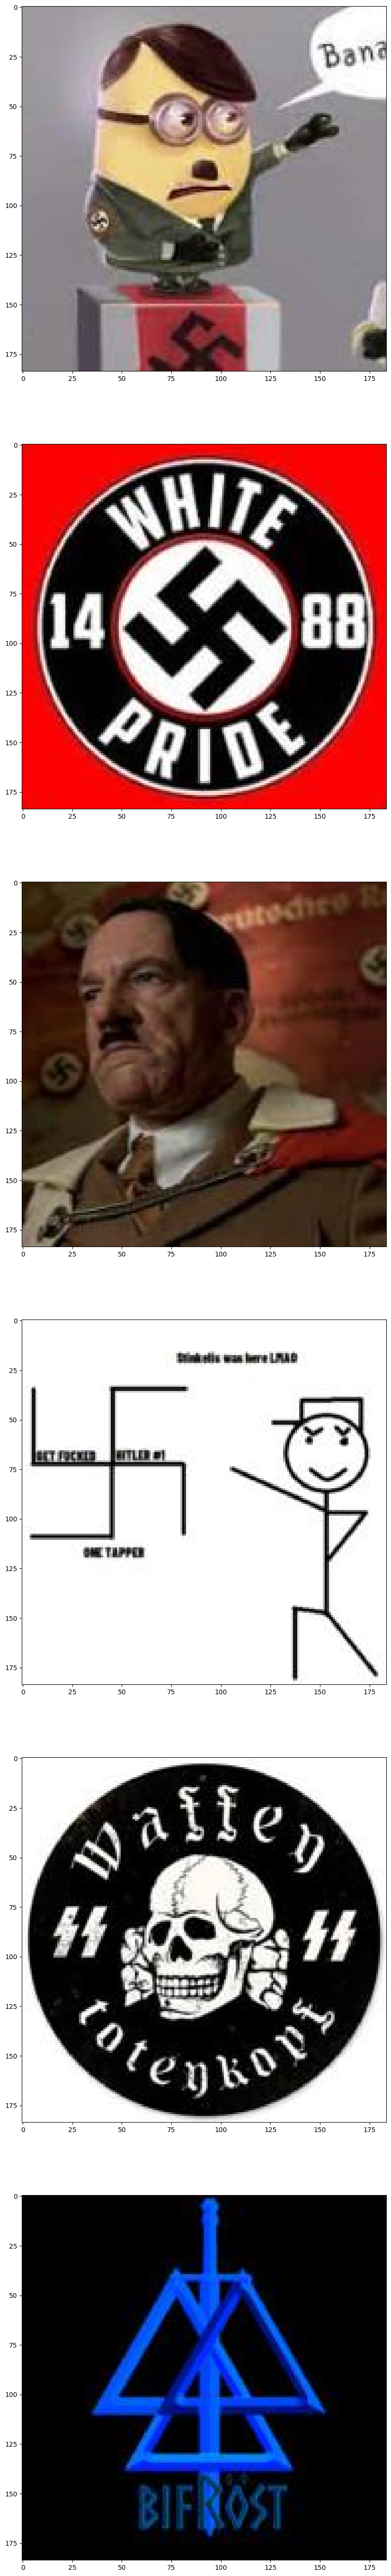

In [25]:
fig = plt.figure(figsize=(100, 70)) 

for i, image_name in enumerate(list(deleted)):
    for folder in ["train", "test", "valid"]:
        if not os.path.exists(f'/Users/zhiweizhang/Downloads/nazi-symbols1.v1i.multiclass/{folder}/{image_name}'):
            continue
        print(image_name)
        img=mpimg.imread(f'/Users/zhiweizhang/Downloads/nazi-symbols1.v1i.multiclass/{folder}/{image_name}')
        fig.add_subplot(6, 1, i + 1) 
        imgplot = plt.imshow(img)